<a href="https://colab.research.google.com/github/elhamkashi/DSPS_EKashi/blob/main/HW8/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import os
import json
#%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/fbb.mplstyle")

from sklearn.impute import SimpleImputer #for mean-imputation in part3

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
#make_axes_locatable(ax) creates an “axes divider” linked to an existing axes object (ax) like in confusion matrix

In [6]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Remember tasks are not completed if you do not comment on the results and include captions

# Task 1 : data ingestion

- Download the Higgs boson data from Kaggle (programmatically within the notebook)

see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data. The command is `!kaggle competitions download......` (you may need to agree to the terms of condition of the higgs boson challenge on the kaggle webpage)


In [7]:
#cd /content/gdrive/MyDrive/
#with gdrive,  no  output
#change gdrive to drive

In [8]:
from google.colab import drive
drive.flush_and_unmount() # suddenly cd /content/drive/MyDrive/ finds some error asking for unmounting .....
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [10]:
ls kaggle.json

kaggle.json


In [11]:
!chmod 600 kaggle.json

In [12]:


# Read the API key file
envs = json.load(open("kaggle.json", "r"))
#envs = json.load(open("kaggle/kaggle.json", "r"))

# Store credentials in environment variables
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

print("✅ Kaggle API configured successfully!")

✅ Kaggle API configured successfully!


In [13]:
#QUESTION: what is wrong with kaggle/kaggle.json??????
#envs = json.load(open("kaggle/kaggle.json", "r"))

In [14]:
#check that it worked by listing the kaggle datasets
#!kaggle datasets list

In [15]:
# i suggest you put the data in a folder inside of your dsps folder, which you shoudl already have
!mkdir dsps

mkdir: cannot create directory ‘dsps’: File exists


In [16]:
cd dsps

/content/drive/MyDrive/dsps


In [17]:
!mkdir higgs-boson

mkdir: cannot create directory ‘higgs-boson’: File exists


In [18]:
#create a directory for these data
!cd higgs-boson/

In [19]:
cd higgs-boson/

/content/drive/MyDrive/dsps/higgs-boson


In [20]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip  training.csv
higgs-boson.zip                          test.zip               training.zip


In [21]:
!kaggle datasets list -s "higgs-boson"  #! is a system command

ref                                             title                                                 size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------  ---------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
ryanholbrook/higgs-boson                        Higgs Boson                                     1100112219  2020-10-02 23:04:26.343000           1136         11  0.375            
knight079/higgsb                                Higgs Boson Dataset                               59325616  2017-10-17 06:27:15.307000            787          7  0.4117647        
mragpavank/higs-bonsons-and-background-process  Higgs bosons and a background process             11985839  2021-01-16 05:54:16.090000            266         28  0.3529412        
erikbiswas/higgs-uci-dataset                    HIGGS UCI DATASET                               2902

In [22]:
!kaggle competitions download -c higgs-boson

higgs-boson.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip	training.csv
higgs-boson.zip				 test.zip		training.zip


In [24]:
!unzip -o higgs-boson.zip

Archive:  higgs-boson.zip
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
  inflating: random_submission.zip   
  inflating: test.zip                
  inflating: training.zip            


In [25]:
!unzip higgs-boson.zip
#QUESTION: why this cell should be useful???

Archive:  higgs-boson.zip
replace HiggsBosonCompetition_AMSMetric_rev1.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace random_submission.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace training.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [26]:
!unzip training.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [27]:
#use the training dataset and make your own trainng test set later
higgsdata = pd.read_csv("training.csv")

# Task 2: data exploration

In [28]:
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [29]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [30]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


do everything else you need to explore the data.... (I can think of 4 more things we have done together)

In [31]:
higgsdata.shape

(250000, 33)

In [32]:
higgsdata.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [33]:
higgsdata.dtypes

,0
EventId,int64
DER_mass_MMC,float64
DER_mass_transverse_met_lep,float64
DER_mass_vis,float64
DER_pt_h,float64
DER_deltaeta_jet_jet,float64
DER_mass_jet_jet,float64
DER_prodeta_jet_jet,float64
DER_deltar_tau_lep,float64
DER_pt_tot,float64


The below code is given by Gemini:

Here is the code to check for missing values in the DataFrame. This will show you how many missing values (represented as -999.0 in this dataset) are present in each column.

It changes the missing values with NAN.

In [34]:
# Check for missing values (represented as -999.0)
# Replace -999.0 with NaN for easier handling of missing values
#Replace -999 with NaN (so sklearn recognizes it as missing)
higgsdata = higgsdata.replace(-999.0, np.nan)
print("Missing values per column:")
print(higgsdata.isnull().sum())

#EventId, lable, and weight have no missing values

Missing values per column:
EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta    

The following text is from chatgpt:

In the Higgs dataset, -999.0 is a placeholder for missing values (this is common in HEP datasets).

If you treat -999 as a real number, your model will think it represents an extreme physical value (far from typical measurements), which will bias the model and lead to wrong results.

🔹 How to handle -999 values

Since -999 actually means missing data, we must handle it before training the model.
There are two standard approaches:

1. Imputation (recommended)

Replace each -999 with a statistically reasonable estimate such as:

The mean or median value of that feature,

Or, if appropriate, another value predicted from correlations with other variables.

Imputation keeps all the rows and ensures the model sees realistic numbers.

2. Removing rows with missing values (less recommended)

You can delete all rows that contain -999. this may remove a large fraction of the dataset and reduce performance — so it’s only used if the number of missing values is very small.


| Step       | Meaning                                      | Action                          |
| ---------- | -------------------------------------------- | ------------------------------- |
| `-999`     | Placeholder for missing data                 | Replace with `NaN`              |
| `NaN`      | Missing value recognized by Python/pandas    | Impute or drop                  |
| Imputation | Fill missing values using mean, median, etc. | Recommended                     |
| Drop       | Remove missing rows                          | Only if very few missing values |

**More on imputation:**

Imputation means replacing missing or invalid data values with estimated ones, so that the dataset can be used by algorithms that can’t handle blanks or NaNs.

Here’s how it works in practice:

Suppose a column  has some missing entries (NaN or -999).

When you impute, you fill those blanks with something reasonable — for example:

the mean (average) of the other mass values,

the median (middle) value,

the most frequent value (mode),

or a predicted value from another model.

In this homework, the  mean imputation is used to handle the missing (-999) values.

**Why mean imputation?**

**Consistency with numerical features:**
The Higgs Boson dataset consists mainly of continuous numerical variables (like energy, mass, momentum). For such data, the mean is a natural representative value for replacing missing entries.

**Preserves dataset size:**
Instead of dropping rows with missing values, mean imputation keeps all events in the dataset, maintaining statistical power.

**Simple and fast:**
Mean imputation is computationally efficient and easy to apply using sklearn’s SimpleImputer.

**Suitable for models used (Random Forest & GBT):**
Both tree-based models are robust to small shifts in feature distributions, so replacing missing values with the mean does not significantly affect performance or introduce bias.

***Replacing missing values with the mean reduces the feature’s variance and can bias the distribution toward the center. However, since Random Forest and Gradient Boosted Tree models are relatively insensitive to these variance shifts, mean imputation remains a simple and effective approach for this dataset.***

So before starting exploration,  we should remove the unvalid points. But as imputation work with numerical values , we should first remove non-numeric data.


# Task 3: data preparation


- Read in the trainind data. Extract the target variables. Split the provided training data into a training and a test set.

The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data (along any other variable you should remove) and create a separate variable `labels` and a separate variable `weights`, which will be your target variables for, respectively, classification and regression.



 you will use two target variables (you can read more about the data at https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf): find the corresponding columns of the DF and save them as labels and weights respectively

**From the provided pdf**:

---EventId: An unique integer identifier of the event. Not to be used as a feature.

---Label: The event label (string) yi = s or b (s for signal, b for background). Not to be used as a feature. Not available in the test sample.

---Weight: The event weight wi, explained in Section 3.3. Not to be used as a feature. Not available in the test sample.

In [35]:
#EventId Anuniqueinteger identifier of the event. Not to be used as a feature.
#Label The event label (string) yi = s or  b (s for signal, b for background). Not to be used as a feature. Not available in the test sample.
#Weight The event weight wi, explained in Section 3.3. Not to be used as a feature. Not available in the test sample.

In [36]:
#.drop needs two arguments, so put the name of columns as a list inside []
#axis=1 to drop columns, axis=1 is essential!!
#axis=0 to drop rows, which is the default!!

#also remember that imputtion cannot work with nonnumeric values, so drop the three columns here:
higgsdata.drop(['EventId',"Label","Weight"], axis=1) #this is the same as higgsdata.drop(columns=['EventId', 'Label', 'Weight'])
higgsdata_features=higgsdata.drop(['EventId',"Label","Weight"], axis=1)
higgsdata_features.head(3)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251


In [37]:
#choosing imputation method:


# Replace NaN with the column mean
imputer = SimpleImputer(strategy='mean')
higgsdata_features_imputed = imputer.fit_transform(higgsdata_features)
data_imputed=higgsdata_features_imputed

In [38]:
higgsdata_features.shape #3 columns removed from 33 coulumns

(250000, 30)

In [39]:
data_imputed.shape

(250000, 30)

In [40]:
#Weight Theeventweight wi, explained in Section 3.3. Not to be used as a feature. Not available in the test sample.

In [41]:
labels = higgsdata['Label']
labels.unique()

array(['s', 'b'], dtype=object)

In [42]:
display(labels.values)
# .values gives you all the data points in array format.

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [43]:
#labels
labels.head(12)

 # 's' stands for signal, 'b' for background. we want to find new real particles, i.e. "signal"

,Label
0,s
1,b
2,b
3,b
4,b
5,b
6,s
7,s
8,b
9,s


In [44]:
labels.tail(10)

,Label
249990,b
249991,s
249992,b
249993,s
249994,b
249995,b
249996,b
249997,s
249998,b
249999,b


it seems that the  Labels "b" are more than Labels "s".

In [45]:
weights = higgsdata['Weight']


In [46]:
weights

# the weight of the particle

,Weight
0,0.002653
1,2.233584
2,2.347389
3,5.446378
4,6.245333
...,...
249995,4.505083
249996,2.497259
249997,0.018636
249998,1.681611


In [47]:
display(weights.values)

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])



**Reminder from Gemini:**

In the context of machine learning and functions like train_test_split, x and y are standard notations:

x: Represents the features or input data. These are the variables your model will use to make predictions. In your code, this is the higgsdata_features DataFrame, which contains all the columns except 'EventId', 'Label', and 'Weight'.



y: Represents the target variable or output. This is what your model is trying to predict. In your code, y is either the labels Series (for the classification task) or the weights Series (for the regression task).

So, when you see train_x, test_x, train_y, and test_y, you're looking at the training and testing sets for the features (x) and the target variable (y), respectively.

In [48]:
# higgsdata_features=higgsdata.drop(['EventId','Label', 'Weight'], axis=1)
#data_imputed = higgsdata_feature_imputed
x=data_imputed
#labels and wights are y
labels = higgsdata['Label']
weights = higgsdata['Weight']

# Split the dataset into training and test sets
x_train, x_test, labels_train, labels_test, weights_train, weights_test = train_test_split(
    x, labels, weights, test_size=0.25, random_state=42
)

print(x_train.shape, x_test.shape, labels_train.shape, labels_test.shape, weights_train.shape, weights_test.shape)

(187500, 30) (62500, 30) (187500,) (62500,) (187500,) (62500,)


use the "training.csv" file, but create your own train/test sets

#Task 4: answer the question (you, not an AI...) why did I not ask you to scale the data like we did in the cluster models?

**The answer is from the lecture notes of the recorded class-15:**

In clustering, we compare variables to an input distance, so we first need to scale the variables  so they exist in a comparable numerical range. However, in classification models (like tree methods), we treat every variable independently and therefore the performance of the model is not susceptible to covariance in the variable. In classification, the data-space is partitioned with lines parallel to variable axes, so it does not matter whether a variable depends on the other, unlike in the clustering where the partition is a diagonal line (distance).

Also, here, each variable has a threshold independent of the other variable's, so  this is the interpretation of the tree that is subject to covariance but not the model performance! hence, no need to scale the variables like clustering.



# Task 5: tree-based classifications

Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the `label` of the particles, i.e. if a particle is `Signal` or `Background`. Get the score of each model on both the training and test set, compare them training and test results and comment on the result for each model (adjust the hyperparameters if you need to)


In [49]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


**Reminder:**

--n_estimators: This is the number of trees in the forest. A higher number of trees generally improves the performance of the model but also increases computation time.

--max_depth: This parameter controls the maximum depth of each tree in the forest. Limiting the depth helps to prevent overfitting. None means that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

--random_state: This is used to set the random seed for the model's random number generator. Setting a random_state ensures that the results are reproducible, meaning you'll get the same split and model training outcome each time you run the code with the same random_state value.

--These are just a few of the many hyperparameters that can be tune in a RandomForestClassifier to optimize its performance.

In [50]:
#now control some hyperparameters

# Random Forest (rf) Classifier for predicting the labels (s or b)
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)


rf.fit(x_train, labels_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [51]:
#the following is corrected by Gemini
# Predict on the training set
train_predictions_rf = rf.predict(x_train)
train_accuracy_rf = accuracy_score(labels_train, train_predictions_rf)

# Predict on the test set
test_predictions_rf = rf.predict(x_test)
test_accuracy_rf = accuracy_score(labels_test, test_predictions_rf)

print("Random Forest Classifier Accuracy:")
print(f"Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Test Accuracy: {test_accuracy_rf:.4f}")
print(f"difference: {train_accuracy_rf - test_accuracy_rf:.4f}")

Random Forest Classifier Accuracy:
Training Accuracy: 0.8191
Test Accuracy: 0.8184
difference: 0.0006


with max_depth =10, it took around 7 minutes to run the cell rf.fit, and the output was: Training accuracy~ .84, Test accuracy~ .83.

with max_depth =9, it took around 5 minutes to run the cell rf.fit, and the output is: Training accuracy=.8356 Test accuracy= .8306

with max_depth =8, it took around 3 minutes to run the cell rf.fit, and the output is: Training accuracy=.8308 Test accuracy= .8284

with max_depth =7, it took  around 2 minutes to run the cell rf.fit, and the output is: Training accuracy=.8261 Test accuracy= .8250

with max_depth =6, it took  less than 2 minutes to run the cell rf.fit, and the output is: Training accuracy=.8191 Test accuracy= .8184

with max_depth =5, it took  less around 1 minute to run the cell rf.fit, and the output is: Training accuracy=.8110 Test accuracy= .8119. (this case has underfitting!)

So keepig maxdepth=6

In [52]:
# Look at parameters used by our current gbt
#gbt = GradientBoostingClassifier(random_state = 0)
#print('Parameters currently in use:\n')
#print(gbt.get_params())

In [53]:
# Gradient Boosted Tree (gbt) Classifier for labels
gbt  = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

gbt.fit(x_train, labels_train)

GradientBoostingClassifier(random_state=42)

RandomForestClassifier: max_depth is a top-level parameter → printed in summary.

GradientBoostingClassifier: max_depth applies to internal trees → not shown in the printed model summary, but still used internally.

In [54]:
# Gradient Boosted Tree (gbt) Classifier for labels
#from sklearn.ensemble import HistGradientBoostingClassifier
#gbt  = HistGradientBoostingClassifier( max_depth=5, random_state=42) #n_estimators=100 results in error for data with nan instead of -999
#gbt.fit(x_train, labels_train)


In [55]:
# Predict on the training set
train_predictions_gbt = gbt.predict(x_train)
train_accuracy_gbt = accuracy_score(labels_train, train_predictions_gbt)

# Predict on the test set
test_predictions_gbt = gbt.predict(x_test)
test_accuracy_gbt = accuracy_score(labels_test, test_predictions_gbt)

print("Random Forest Classifier Accuracy:")
print(f"Training Accuracy: {train_accuracy_gbt:.4f}")
print(f"Test Accuracy: {test_accuracy_gbt:.4f}")
print(f"difference: {train_accuracy_gbt - test_accuracy_gbt:.4f}")

Random Forest Classifier Accuracy:
Training Accuracy: 0.8319
Test Accuracy: 0.8312
difference: 0.0007





with max_depth =10, it took around 15 minutes to run the cell gbt.fit, and the output was: Training accuracy=.9039, Test accuracy= .8411.

with max_depth =8, it took around 14 minutes to run the cell gbt.fit, and the output is: Training accuracy=.8693, Test accuracy= .8412

with max_depth =7, it took around 12 minutes to run the cell gbt.fit, and the output is: Training accuracy=.8589, Test accuracy= .8404

with max_depth =6, it took around 10 minutes to run the cell gbt.fit, and the output is: Training accuracy=.8507, Test accuracy= .8403

with max_depth =5, it took less than 7 minutes to run the cell gbt.fit, and the output is: Training accuracy=.8442, Test accuracy= .8385

with max_depth =4, it took around 4 minutes to run the cell gbt.fit, and the output is: Training accuracy=.8380, Test accuracy= .8360

with max_depth =3, it took around 3 minutes to run the cell gbt.fit, and the output is: Training accuracy=.8319, Test accuracy= .8312

So keepig maxdepth=3

# Task 6: model evaluation

calculate the  scores for the training and test sets and compare etc

In [56]:
print(f"the RF scores on the training test is {train_accuracy_rf:.4f}, on the test is {test_accuracy_rf:.4f}")
print("this indicates this model performs well on both the trained and test sets of data.")

print(f"\nthe GBT scores on the training test is {train_accuracy_gbt:.4f}, on the test is {test_accuracy_gbt:.4f}")
print("\nThis indicates that gbt also performs well and generalize nicely to unseen test data, although this model has different max-depth.\n  The slight difference between training and test accuracy  in these models suggest minimal overfitting.  ")

the RF scores on the training test is 0.8191, on the test is 0.8184
this indicates this model performs well on both the trained and test sets of data.

the GBT scores on the training test is 0.8319, on the test is 0.8312

This indicates that gbt also performs well and generalize nicely to unseen test data, although this model has different max-depth.
  The slight difference between training and test accuracy  in these models suggest minimal overfitting.  


**Comment** is your model performing well? is it .... overfitting?



**Reminder** : An overfitted model has much higher accuracy on the training data compared to the accuracy of the test data. Because, along with the generative behavior, the noise is also fitted and noise cannot be reproduced so the accuracy of fiiting in training set is not repeated in the test set, therefore, the model has become too specialized to the training set and cannot generalize well to the test data it hasn't seen before.

**Here:** The scores of each  model depends on hyperparameter  *max_depth*, as changing this amount changes the scores. for rf model, the best max_depth to keep the train and test scores closer is 6, and for gbt model the max_depth is better to be 3 to avoid overfitting.


When comparing models, we look at their performance on the test set after they have been tuned by adjusting max_depth to avoid overfitting. The model that achieves a better score on the test set, while still generalizing well (i.e., not significantly overfitted), is considered the better model for that task.

So, even though the max_depth values are different for your RF and GBT models,  comparing their performance after optimizing them and ensure they generalize reasonably well, **they indicate similar accuracy scores which shows a good perforamce for both**.

The Random Forest and Gradient Boosted Tree models were trained with different maximum depths, this comparison is valid because each model was tuned to achieve its optimal performance. The difference in depth reflects their distinct learning mechanisms—Random Forests benefit from deeper trees due to averaging, while GBT models achieve good generalization with shallower, sequentially optimized trees.

- Produce a confusion matrix for each model and compare them






In [57]:
# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix, make sure you pass appropriate label

In [58]:


def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='', labels=["P=Signal", "N=background"],
                          cmap=plt.cm.bone, figsize=(4, 4), fontsize=8):
    """
    Plots a confusion matrix.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        normalize (bool, optional): If True, normalize the confusion matrix. Defaults to False.
        title (str, optional): Title of the plot. Defaults to ''.
        labels (list, optional): List of labels for the classes. Defaults to ["P", "N"].
        cmap (matplotlib.colors.Colormap, optional): Colormap for the plot. Defaults to plt.cm.bone.
        figsize (tuple, optional): Figure size. Defaults to (6, 6).
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'
    # Compute confusion matrix
    if normalize:
      cm = confusion_matrix(y_true, y_pred, normalize='all')
    else:
      cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.subplots_adjust()
    #im = ax.imshow(cm, interpolation='nearest', cmap=cmap) this is in standard sklearn
    im = ax.imshow(np.rot90(cm), cmap=cmap)#np.rot90(cm) rotates the confusion matrix 90° counterclockwise before plotting.
    #That means the positions of the cells are shifted relative to the default sklearn orientation.
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=labels[::-1], fontsize=8)



    plt.text(0,1, cm[0,0], ha='center', c="k" if cm[0,0] > 0.1 * cm.sum() else "w")
    plt.text(0,0, cm[0,1], ha='center', c="k" if cm[0,1] > 0.1 * cm.sum() else "w")
    plt.text(1,1, cm[1,0], ha='center', c="k" if cm[1,0] > 0.1 * cm.sum() else "w")
    plt.text(1,0, cm[1,1], ha='center', c="k" if cm[1,1] > 0.1 * cm.sum() else "w")

    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=labels, fontsize=8)
    plt.xlabel("prediction", fontsize=10)
    plt.ylabel("truth", fontsize=10)
    plt.title(title, fontsize=10) # Added fontsize
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)

I got a bit confused about the cells of the matrix,

The following is explained by chatgpt:

In [59]:
#the confusion matrix is flipped compared to the usual sklearn layout.
#Let’s decode it carefully based on the code and figure.
#plt.text(0,1, cm[0,0], ...)   # printed in top-left cell
#plt.text(0,0, cm[0,1], ...)   # printed in bottom-left cell
#plt.text(1,1, cm[1,0], ...)   # printed in top-right cell
#plt.text(1,0, cm[1,1], ...)   # printed in bottom-right cell

#🔹 The key is this line:
#im = ax.imshow(np.rot90(cm), cmap=cmap)
#np.rot90(cm) rotates the confusion matrix 90° counterclockwise before plotting.
#That means the positions of the cells are shifted relative to the default sklearn orientation.


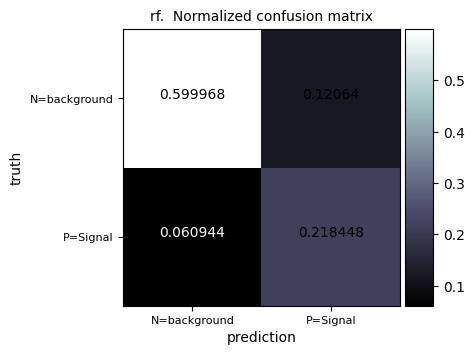

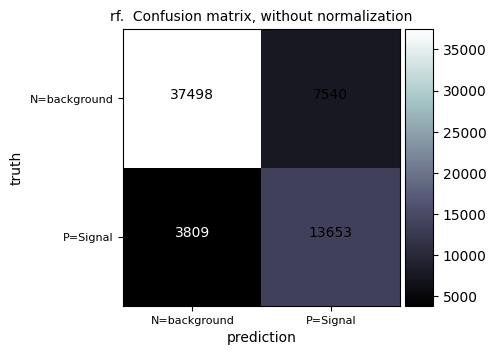

RF-model:
True Negative (NN): 37498
False Positive (PN): 3809
False Negative (NP): 7540
True Positive (PP): 13653


In [60]:
# Predictions for Random Forest model
y_pred_rf_label = rf.predict(x_test)


# Plot confusion matrix for Random Forest model with normalization
plot_confusion_matrix(labels_test, y_pred_rf_label, normalize=True, title='rf. ')


# Plot confusion matrix for Random Forest model without normalization
plot_confusion_matrix(labels_test, y_pred_rf_label, normalize=False, title='rf. ')

plt.show()

#given by chatgpt
cm_rf = confusion_matrix(labels_test, y_pred_rf_label)

# Extract values
TN_rf = cm_rf[0, 0]  # True Negative
FP_rf = cm_rf[0, 1]  # False Positive
FN_rf = cm_rf[1, 0]  # False Negative
TP_rf = cm_rf[1, 1]  # True Positive

# Display the counts for RF
print("RF-model:")
print("True Negative (NN):", TN_rf)
print("False Positive (PN):", FP_rf)
print("False Negative (NP):", FN_rf)
print("True Positive (PP):", TP_rf)

The following table is given by chatgpt, but the caption is a text just  corrected by chatgpt, I gave my text asking for corrections and more details

 the visual positions correspond to:

| Matrix Index | Position on Plot | Truth | Prediction | Meaning (truth → prediction)                        | Example Value |
| ------------ | ---------------- | ----- | ---------- | --------------------------------------------------- | ------------- |
| **[0,0]**    | Top-left         | N     | N          | True Negative (background correctly predicted)      | **NN**     |
| **[0,1]**    | Top-right        | N     | P          | False Positive (background misclassified as signal) | **NP**      |
| **[1,0]**    | Bottom-left      | P     | N          | False Negative (signal misclassified as background) | **PN**      |
| **[1,1]**    | Bottom-right     | P     | P          | True Positive (signal correctly predicted)          | **PP**     |


**Caption:**

Confusion matrices for Random Forest Model — normalized (top) and unnormalized (bottom). They show how well the model distinguishes background and signal events.. The column Label  shows binary variables : signal particles as "s" and background particles as "b". The diagonal cells are NN (bb) and PP (ss). The  PP-cell represents the times the predicted signals are matched with the true signals, NN represents the times that the predicted-backgrounds are matched with the actual backgrounds, NP represents the times the lable was  predicted as signal but the actual lable of particle was background. PN is the opposite of NP. PN is the times that  real signal particles were  predicted falsely as background (b).

Based on the values of these results,the majority of background events are correctly identified (with the largest count shown in top-left cell), and most signal events are also correctly classified (bottom-right cell), with relatively smaller fractions of false positives (top-right cell)and false negatives. Overall, the model demonstrates strong discrimination between signal and background events, highlighting a good RF-model performance with few misclassifications.


Another important thing to notice: Both normalized and unnormalized confusion matrices are shown to provide complementary insights into the model’s performance. The unnormalized matrix displays the actual counts of correctly and incorrectly classified events, revealing the scale of the dataset and the total number of misclassifications. The normalized matrix instead shows the relative proportions within each class, making it easier to compare how well the model performs across classes regardless of sample size. In the normalized matrix, the color intensity changes from dark (near 0) to light (near 1), indicating the fraction of correctly or incorrectly classified samples — lighter cells represent higher proportions of predictions.

In [61]:
#do the same fo GBT, dont forget your captions!!

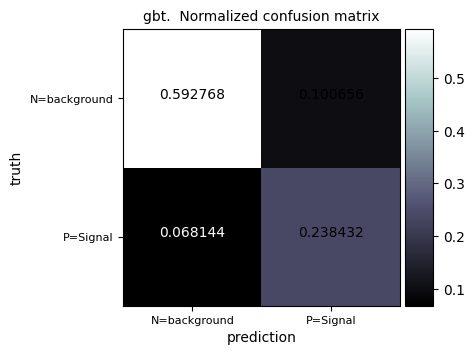

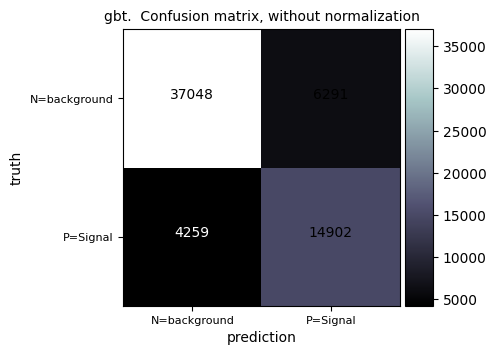

GBT model:
True Negative (NN): 37048
False Positive (PN): 4259
False Negative (NP): 6291
True Positive (PP): 14902


In [62]:
y_pred_gbt_label = gbt.predict(x_test)

# Predictions for Gradient Boosted Tree model
# the GBT model was fitted with gbt.fit(x_train, labels_train)

# Plot confusion matrix for Gradient Boosted Tree model with normalization
plot_confusion_matrix(labels_test, y_pred_gbt_label, normalize=True, title='gbt. ')

# Plot confusion matrix for Gradient Boosted Tree model without normalization
plot_confusion_matrix(labels_test, y_pred_gbt_label, normalize=False, title='gbt. ')

plt.show()

#show the values on each cell
cm_gb = confusion_matrix(labels_test, y_pred_gbt_label)

# Extract values for gbt model
TN_gbt = cm_gb[0, 0]  # True Negative
FP_gbt = cm_gb[0, 1]  # False Positive
FN_gbt = cm_gb[1, 0]  # False Negative
TP_gbt = cm_gb[1, 1]  # True Positive

# Display the counts for GBT
print("GBT model:")
print("True Negative (NN):", TN_gbt)
print("False Positive (PN):", FP_gbt)
print("False Negative (NP):", FN_gbt)
print("True Positive (PP):", TP_gbt)

| Matrix Index | Position on Plot | Truth | Prediction | Meaning (truth → prediction)                        | Unnormalized Value |
| ------------ | ---------------- | ----- | ---------- | --------------------------------------------------- | ------------- |
| **[0,0]**    | Top-left         | N     | N          | True Negative (background correctly predicted)      | **NN**     |
| **[0,1]**    | Top-right        | N     | P          | False Positive (background misclassified as signal) | **NP**      |
| **[1,0]**    | Bottom-left      | P     | N          | False Negative (signal misclassified as background) | **PN**      |
| **[1,1]**    | Bottom-right     | P     | P          | True Positive (signal correctly predicted)          | **PP**     |



Confusion matrices for the Gradient Boosted Tree (GBT) model — normalized (top) and unnormalized (bottom). They show how well the classifier distinguishes between signal and background events in the Higgs Boson dataset. Most background and signal events are correctly identified (diagonal cells), with relatively small fractions of false positives and false negatives, indicating strong predictive performance of the GBT model.

Like RF model, the normalized and unnormalized  representations provide a complete picture: the unnormalized matrix conveys absolute performance, while the normalized matrix highlights class-balanced accuracy and the relative strength of the model’s predictions

Plot a simple ROC curve for the RF and GBT models  a d describe it in a caption.

In [63]:
#instruction : test_y.reshape(-1, 1).flatten() == "s"
# the instruction output: array([False, False,  True, ...,  True, False, False])

In [64]:
#this will be passed to the ROC function,

labels_test.values.reshape(-1, 1).flatten() == "s"

array([False, False, False, ..., False, False, False])

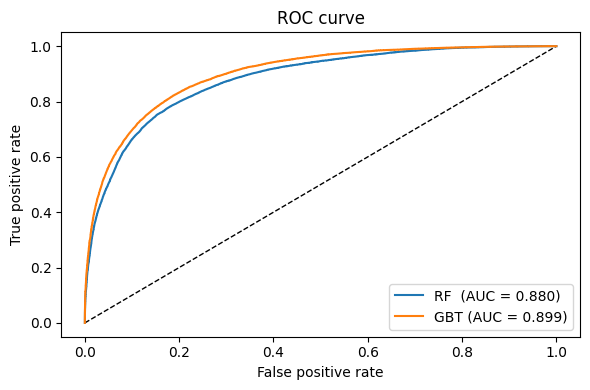

In [65]:

# --- Compute probabilities ---
y_pred_grd_rfcat  = rf.predict_proba(x_test)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(x_test)[:, 1]

# --- Compute ROC curve points ---
fpr_rf,  tpr_rf,  _ = roc_curve(labels_test.values.reshape(-1, 1).flatten() == "s", y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(labels_test.values.reshape(-1, 1).flatten() == "s", y_pred_grd_gbtcat)

# --- Compute AUC values ---
auc_rf  = roc_auc_score(labels_test.values.reshape(-1, 1).flatten() == "s", y_pred_grd_rfcat)
auc_gbt = roc_auc_score(labels_test.values.reshape(-1, 1).flatten() == "s", y_pred_grd_gbtcat)

# --- Plot ROC curves ---
plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.plot(fpr_rf,  tpr_rf,  label=f'RF  (AUC = {auc_rf:.3f})')
plt.plot(fpr_gbt, tpr_gbt, label=f'GBT (AUC = {auc_gbt:.3f})')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


**Caption is based on class16-video and also added by chatgpt:**

ROC curves comparing the performance of the Random Forest (RF) and Gradient Boosted Tree (GBT) classifiers on the Higgs Boson dataset. The True Positive Rate (TPR) is plotted against the False Positive Rate (FPR) for each model, with the dashed diagonal line representing random classification.

The GBT curve (orange) has greater value and lies consistently above the RF curve (blue), indicating that for any given false positive rate, the GBT achieves a higher true positive rate, the closer to 1 the better! This means GBT more effectively distinguishes between signal and background events. In other words, the Area Under the Curve (AUC) for GBT is larger, showing it has better overall predictive performance.

GBT performs better because it sequentially builds trees where each new tree corrects the errors of the previous ones, leading to finer optimization of decision boundaries and lower bias, whereas the Random Forest averages many independent trees, which reduces variance but doesn’t optimize misclassifications as effectively.

#Task 7 required for 661, EC for 461, tree-based regression


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test sets


In [66]:

#Random Forest Tree Regressor model to predict the weight
#step1
train_regress_x=x_train
train_regress_y=weights_train

rfR = RandomForestRegressor(max_depth=3, random_state=302)
rfR.fit(train_regress_x, train_regress_y)

RandomForestRegressor(max_depth=3, random_state=302)

In [67]:
##Random Forest Tree Regressor model to predict the weight
#step2

# Prediction on training set
train_predictions_rf_weight = rfR.predict(x_train)
train_mse_rf_weight = mean_squared_error(weights_train, train_predictions_rf_weight)

# Prediction on the test set
test_predictions_rf_weight = rfR.predict(x_test)
test_mse_rf_weight = mean_squared_error(weights_test, test_predictions_rf_weight)

print("\nRandom Forest Regressor for Weight Prediction:")
print(f"Training MSE: {train_mse_rf_weight:.4f}")
print(f"Test MSE: {test_mse_rf_weight:.4f}")
print(f"difference: {train_mse_rf_weight - test_mse_rf_weight:.4f}")


Random Forest Regressor for Weight Prediction:
Training MSE: 1.8377
Test MSE: 1.8143
difference: 0.0235


In [68]:
#Gradiend Boosted Tree Regressor model to predict the weight of the particles.
#step1

train_regress_x=x_train
train_regress_y=weights_train

gbtR = GradientBoostingRegressor(max_depth=3, random_state=302)
gbtR.fit(train_regress_x, train_regress_y)

GradientBoostingRegressor(random_state=302)

In [69]:
#Gradiend Boosted Tree Regressor model to predict the weight of the particles.
#step2

# Predict on the training set for weight
train_predictions_gbt_weight = gbtR.predict(x_train)
train_mse_gbt_weight = mean_squared_error(weights_train, train_predictions_gbt_weight)

# Predict on the test set for weight
test_predictions_gbt_weight = gbtR.predict(x_test)
test_mse_gbt_weight = mean_squared_error(weights_test, test_predictions_gbt_weight)

print("\nGradient Boosted Tree Regressor for Weight Prediction:")
print(f"Training MSE: {train_mse_gbt_weight:.4f}")
print(f"Test MSE: {test_mse_gbt_weight:.4f}")
print(f"difference: {train_mse_gbt_weight - test_mse_gbt_weight:.4f}")


Gradient Boosted Tree Regressor for Weight Prediction:
Training MSE: 1.3598
Test MSE: 1.3565
difference: 0.0033


In [70]:
print("\nRF Regressor for Weight Prediction:")
print(f"Training MSE: {train_mse_rf_weight:.4f}")
print(f"Test MSE: {test_mse_rf_weight:.4f}")
print(f"difference: {train_mse_rf_weight - test_mse_rf_weight:.4f}")

print("\nGBT Regressor for Weight Prediction:")
print(f"Training MSE: {train_mse_gbt_weight:.4f}")
print(f"Test MSE: {test_mse_gbt_weight:.4f}")
print(f"difference: {train_mse_gbt_weight - test_mse_gbt_weight:.4f}")


RF Regressor for Weight Prediction:
Training MSE: 1.8377
Test MSE: 1.8143
difference: 0.0235

GBT Regressor for Weight Prediction:
Training MSE: 1.3598
Test MSE: 1.3565
difference: 0.0033


**The results show**:

*Generalization and model stability:*

The difference between training and test MSE indicates how well a model generalizes to unseen data.

The GBT model shows an extremely small gap (0.0033), suggesting excellent generalization with minimal overfitting.

The RF model also generalizes well, but the slightly larger gap (0.0235) indicates a bit more variation between training and test performance.

*Model accuracy:*

The GBT has lower MSE values on both the training and test sets, which means it achieves higher predictive accuracy and produces smaller average squared errors in weight prediction.

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [71]:
#L1, L2 for RF model
test_regress_x=x_test
test_regress_y=weights_test

# Predictions for Random Forest Regressor
y_pred_rf_weight = rfR .predict(x_test)

# Calculate L2 (Mean Squared Error) loss
L2_rf = mean_squared_error(weights_test, y_pred_rf_weight)

# Calculate L1 (Mean Absolute Error) loss
L1_rf = mean_absolute_error(weights_test, y_pred_rf_weight)

In [72]:
#L1 and L2 for gbt model


# Predictions for Gradient Boosted Tree Regressor
y_pred_gbt_weight = gbtR.predict(x_test)

# Calculate L2 (Mean Squared Error) loss
L2_gbt = mean_squared_error(weights_test, y_pred_gbt_weight)

# Calculate L1 (Mean Absolute Error) loss
L1_gbt = mean_absolute_error(weights_test, y_pred_gbt_weight)

with the instruction:print(f"L1 RF {L1(test_regress_y,......

it was an error and so i changed it a bit

The error TypeError: 'float' object is not callable in cell CAMTAgRTIeHq is happening because you are trying to call a float variable as if it were a function. In the previous cell , you calculated the L1 and L2 losses and stored the float results in the variables L1_rf and L2_rf.

To fix this, you need to call the original functions mean_absolute_error and mean_squared_error again with the test data and predictions.

In [73]:
test_regress_x=x_test
test_regress_y=weights_test

print(f"L1 RF: {mean_absolute_error(test_regress_y,  rfR.predict(test_regress_x)):.2f}, L2 RF: {mean_squared_error(test_regress_y, rfR.predict(test_regress_x)):.2f}")
print(f"\nL1 GBT: {mean_absolute_error(test_regress_y,  gbtR.predict(test_regress_x)):.2f}, L2 GBT: {mean_squared_error(test_regress_y, gbtR.predict(test_regress_x)):.2f}")

L1 RF: 1.00, L2 RF: 1.81

L1 GBT: 0.84, L2 GBT: 1.36


**Discuss!**

text is refined by chatgpt

The goal of this regression task is to predict the particle weights using both rf and gbt  models. Their performance was evaluated using the L1 (Mean Absolute Error) and L2 (Mean Squared Error) metrics on the test set.


The L2 error is higher than the L1 error for both RF and GBT models, which is expected since L2 (mean squared error) penalizes large deviations more heavily than L1 (mean absolute error). This means that while most predictions are close to the true values, some larger errors exist that contribute more strongly to the L2 value.

L1 loss provides the average magnitude of prediction errors and is less sensitive to outliers, while L2 amplifies the effect of larger mistakes. In this comparison, both RF and GBT show low L1 and L2 values, but GBT achieves smaller errors overall, indicating that it produces more consistent and accurate predictions with fewer large deviations from the true weights.


Why GBT performs better:
GBT improves performance by sequentially correcting the errors of earlier trees, effectively reducing both bias and variance.
RF, in contrast, builds many independent trees and averages them, which reduces variance but doesn’t iteratively refine predictions.
As a result, GBT often yields more precise and consistent predictions in regression tasks.

#Task 8: Choose between feature importance and grid optimization (due for both 461 and 661)







# Task 8a: feature importance
Use the "Titanic notebook" as a guide for the feature importance analysis  https://github.com/fedhere/DSPS_FBianco/blob/main/Labs/DSPS_2025_titanictree.ipynb

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

(your features may looks slightly different than mine)

**1-Feature importance for RF**

In [74]:

# assuming rf is your trained RandomForestClassifier
#importances = rf.feature_importances_
#features = x.columns
#features = higgsdata_features_imputed.columns
#features = higgsdata_features.columns

In [75]:
# higgsdata_features=higgsdata.drop(['EventId','Label', 'Weight'], axis=1)
#we Imputed missing values
#data_imputed = higgsdata_feature_imputed
#x=data_imputed
#SimpleImputer outputs a NumPy array without column labels.
#feature_importances  needs the name of columns
# Converting the imputed array back to a pandas DataFrame using the original feature names fixes this.
higgsdata_features_imputed = pd.DataFrame(data_imputed, columns=higgsdata_features.columns)

# Extract feature importances from trained Random Forest model
importances = rf.feature_importances_

# Create a labeled table of feature importances
feat_importances = pd.DataFrame({
    'Feature': higgsdata_features_imputed.columns,
    'Importance': importances
})

# Sort by importance descending
feat_importances = feat_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Show top 20 features
print(feat_importances.head(20))


                        Feature  Importance
0   DER_mass_transverse_met_lep    0.231498
1                  DER_mass_MMC    0.177664
2                  DER_mass_vis    0.111523
3                    PRI_tau_pt    0.101757
4        DER_met_phi_centrality    0.085801
5          DER_pt_ratio_lep_tau    0.049670
6          DER_deltaeta_jet_jet    0.037849
7           DER_prodeta_jet_jet    0.034288
8            DER_deltar_tau_lep    0.029632
9        DER_lep_eta_centrality    0.028069
10                      PRI_met    0.023526
11             DER_mass_jet_jet    0.018847
12                     DER_pt_h    0.017242
13                   DER_sum_pt    0.013839
14                  PRI_jet_num    0.007028
15               PRI_jet_all_pt    0.006784
16                   PRI_lep_pt    0.005859
17                   DER_pt_tot    0.005294
18                PRI_met_sumet    0.004291
19           PRI_jet_leading_pt    0.003742


In [76]:
# Assuming you already have: higgsdata_features_imputed, labels_train, labels_test, etc.
#The standard deviation of feature importances is computed across multiple Random Forest runs,
# capturing how consistently each feature contributes to classification.

# 1. Define your feature matrix (X) and labels (y)
# ===========================================
# X: all predictor variables after imputation (the model inputs)
# y: target column ('Label') representing signal/background
#y = higgsdata['Label'] simply defines the model’s target variable for training — it’s not used in calculating the standard deviation.
X = higgsdata_features_imputed
y = higgsdata['Label']

# ===========================================
# 2. Number of runs for averaging feature importance
# ===========================================
# Running the model multiple times smooths out randomness
# (since Random Forest uses random sampling and feature selection)

# Number of repeated runs
n_runs = 5 #i changed this from 10 to 5 at final run


# Initialize a list to store feature importances from each run
# Store importances from each run
importances_list = []

# ===========================================
# 3. Train the Random Forest model multiple times
# ===========================================

for seed in range(n_runs):
  # Create a Random Forest model with fixed parameters
    rf = RandomForestClassifier(
        n_estimators=100,  #number of trees
        max_depth=6,
        random_state=seed  # ensures reproducibility across runs
    )
    rf.fit(X, y)   # Train (fit) the model on the full dataset
    importances_list.append(rf.feature_importances_)  # Store the resulting feature importances from this run

# ===========================================
# 4. Compute the mean and standard deviation of importances
# ===========================================
# Convert list of importances (from each run) to a NumPy array
importances_array = np.array(importances_list)

# Calculate mean importance of each feature across runs
importances_mean = np.mean(importances_array, axis=0)

# Calculate standard deviation of importance for each feature
# (measures how consistent each feature’s importance is between runs)
importances_std = np.std(importances_array, axis=0)

# ===========================================
# 5. Create a labeled DataFrame with results
# ===========================================
# Create labeled table
feat_importances = pd.DataFrame({
    'Feature': X.columns,
    'Mean Importance': importances_mean,
    'Std Importance': importances_std
})

# Sort features by mean importance (descending order)
feat_importances = feat_importances.sort_values(by='Mean Importance', ascending=False).reset_index(drop=True)

# ===========================================
# 6. Display results in "mean ± std" format
# ===========================================
print("Random Forest feature importance\n")
for i, row in feat_importances.iterrows():
    print(f"{row['Feature']} {row['Mean Importance']:.2f} ± {row['Std Importance']:.2f}")

Random Forest feature importance

DER_mass_transverse_met_lep 0.22 ± 0.02
DER_mass_MMC 0.17 ± 0.01
DER_mass_vis 0.11 ± 0.00
DER_met_phi_centrality 0.10 ± 0.01
PRI_tau_pt 0.09 ± 0.01
DER_pt_ratio_lep_tau 0.06 ± 0.01
DER_deltaeta_jet_jet 0.04 ± 0.01
DER_prodeta_jet_jet 0.03 ± 0.00
DER_deltar_tau_lep 0.03 ± 0.00
DER_lep_eta_centrality 0.03 ± 0.00
DER_mass_jet_jet 0.03 ± 0.00
PRI_met 0.02 ± 0.00
DER_sum_pt 0.01 ± 0.00
DER_pt_h 0.01 ± 0.00
PRI_jet_all_pt 0.01 ± 0.00
PRI_jet_num 0.01 ± 0.00
PRI_lep_pt 0.01 ± 0.00
DER_pt_tot 0.00 ± 0.00
PRI_met_sumet 0.00 ± 0.00
PRI_jet_leading_pt 0.00 ± 0.00
PRI_jet_leading_eta 0.00 ± 0.00
PRI_lep_eta 0.00 ± 0.00
PRI_jet_subleading_eta 0.00 ± 0.00
PRI_tau_eta 0.00 ± 0.00
PRI_jet_subleading_pt 0.00 ± 0.00
PRI_jet_leading_phi 0.00 ± 0.00
PRI_jet_subleading_phi 0.00 ± 0.00
PRI_lep_phi 0.00 ± 0.00
PRI_met_phi 0.00 ± 0.00
PRI_tau_phi 0.00 ± 0.00


In [77]:
higgsdata.drop(["EventId", "Label", "Weight"], axis=1)[feat_importances['Feature'][::-1]] #this sorts the data by feature

,PRI_tau_phi,PRI_met_phi,PRI_lep_phi,PRI_jet_subleading_phi,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_tau_eta,PRI_jet_subleading_eta,PRI_lep_eta,PRI_jet_leading_eta,...,DER_lep_eta_centrality,DER_deltar_tau_lep,DER_prodeta_jet_jet,DER_deltaeta_jet_jet,DER_pt_ratio_lep_tau,PRI_tau_pt,DER_met_phi_centrality,DER_mass_vis,DER_mass_MMC,DER_mass_transverse_met_lep
0,0.381,-0.277,-2.414,-2.475,0.444,46.062,1.017,1.24,2.273,2.150,...,0.2,3.064,2.666,0.91,1.582,32.638,1.396,97.827,138.470,51.655
1,-3.011,-1.916,0.103,NaN,1.158,NaN,2.039,NaN,0.501,0.725,...,NaN,3.473,NaN,NaN,0.879,42.014,1.414,103.235,160.937,68.768
2,-2.093,-2.186,1.052,NaN,-2.028,NaN,-0.705,NaN,-0.953,2.053,...,NaN,3.148,NaN,NaN,3.776,32.154,1.414,125.953,NaN,162.172
3,0.010,0.060,-3.100,NaN,NaN,NaN,-1.655,NaN,-0.522,NaN,...,NaN,3.310,NaN,NaN,2.354,22.647,-1.285,80.943,143.905,81.417
4,-2.231,-0.871,1.569,NaN,NaN,NaN,-2.197,NaN,0.798,NaN,...,NaN,3.891,NaN,NaN,1.056,28.209,-1.385,134.805,175.864,16.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-0.905,2.859,0.380,NaN,NaN,NaN,-0.414,NaN,-0.950,NaN,...,NaN,1.392,NaN,NaN,1.258,24.754,-1.414,36.548,NaN,71.989
249996,2.776,-0.867,1.042,NaN,NaN,NaN,-1.609,NaN,0.308,NaN,...,NaN,2.585,NaN,NaN,1.162,23.416,-1.345,68.083,NaN,58.179
249997,-3.132,-2.890,0.851,NaN,-0.166,NaN,-0.266,NaN,0.381,1.800,...,NaN,2.390,NaN,NaN,1.202,35.636,0.529,75.839,105.457,60.526
249998,2.792,0.811,-0.296,NaN,NaN,NaN,-2.211,NaN,-0.874,NaN,...,NaN,3.365,NaN,NaN,0.999,27.944,1.414,68.812,94.951,19.362


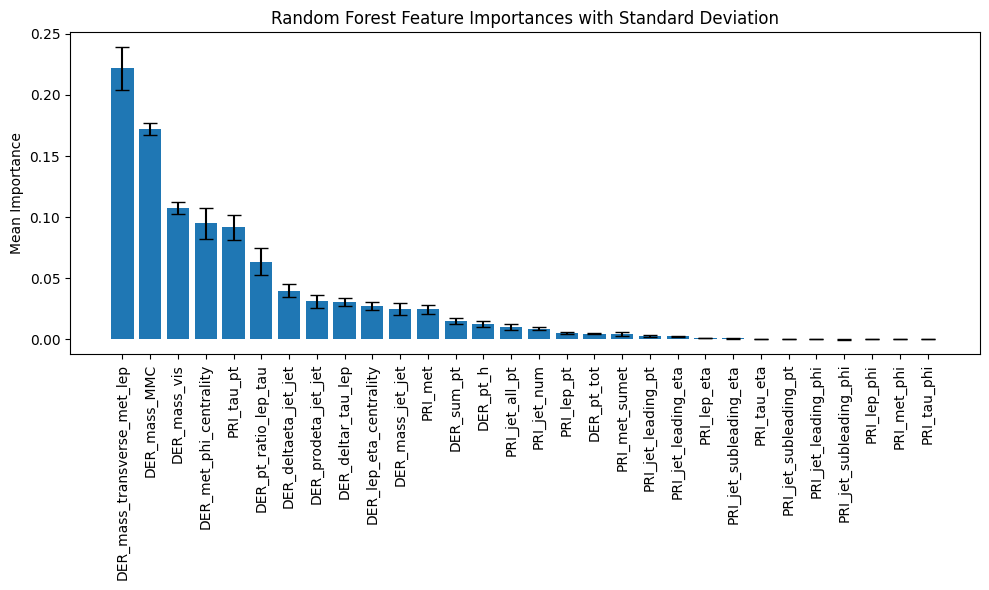

In [78]:
# Assuming feat_importances DataFrame is available from the previous cell (km4H68cj3R8O)

plt.figure(figsize=(10, 6))
plt.bar(feat_importances['Feature'], feat_importances['Mean Importance'], yerr=feat_importances['Std Importance'], capsize=5)
plt.xticks(rotation=90)
plt.ylabel('Mean Importance')
plt.title('Random Forest Feature Importances with Standard Deviation')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

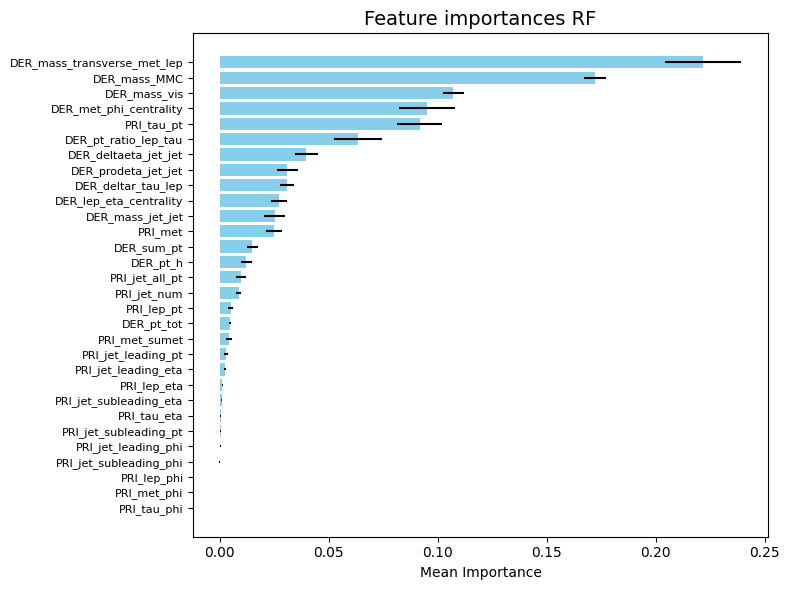

In [79]:



# Sort features by mean importance (highest to lowest)
sorted_idx = np.argsort(importances_mean)[::-1]

# Get sorted values
sorted_importances = importances_mean[sorted_idx]
sorted_std = importances_std[sorted_idx]
sorted_features = higgsdata_features_imputed.columns[sorted_idx]

# Create the figure
plt.figure(figsize=(8, 6))
plt.title("Feature importances RF", fontsize=14)

# Plot horizontal bars with error bars showing ± std
plt.barh(range(len(sorted_features)), sorted_importances,
         xerr=sorted_std, align='center', color='skyblue', ecolor='black')

# Add feature names as y-axis labels
plt.yticks(range(len(sorted_features)), sorted_features, fontsize=8)

# Invert y-axis so the most important feature is on top
plt.gca().invert_yaxis()

# Axis labels
plt.xlabel("Mean Importance", fontsize=10)
plt.tight_layout()
plt.show()


**Caption:**
Feature importances for the Random Forest (RF) model, ranked by their mean contribution to classification performance across 10 independent runs. Each horizontal bar represents the average importance of a feature, with black error bars showing the ±1 standard deviation (std) variation across runs. The most influential features — DER_mass_transverse_met_lep, DER_mass_MMC, DER_mass_vis and DER_met_phi_centrality  — dominate the model, indicating that these variables (especially the firt three)  carry the strongest discriminative power between signal and background events. Less important features contribute minimally to the model’s decision process, reflecting their weaker correlation with the target classification.


* DER_mass_MMC (the "reconstructed mass") is an estimate of the mass of the Higgs  boson reconstructed from its decay products (like leptons, jets, and missing energy).

* DER_mass_transverse_met_lep = the transverse mass computed from the lepton and missing energy system (MET = missing transverse energy).

*  DER_mass_vis = mass reconstructed only from visible particles detected by the experiment.











In [80]:
# ===========================================
# Find and display the 4 most important features
# ===========================================

# Extract feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Find the indices of the top 4 most important features
# argsort() sorts the importances from smallest to largest
# [-4:] takes the last 4 (largest) values, and [::-1] reverses their order (highest first)
fourtop_feature_indices = importances.argsort()[-4:][::-1]

# Get the corresponding feature names from the original dataset
fourtop_features = higgsdata_features_imputed.columns[fourtop_feature_indices]

# Print the names of the top 4 features
print("Top 4 Most Important Features:")
for feature in fourtop_features:
    print(feature)

# Print their corresponding importance values
#print("\nCorresponding Importances:")
#for index in top_feature_indices:
 #   print(f"{higgsdata_features.columns[index]}: {importances[index]:.4f}")
# Print each feature with its mean ± std
print("\nCorresponding Importances (Mean ± Std):")
for index in fourtop_feature_indices:
    print(f"{higgsdata_features_imputed.columns[index]}: {importances_mean[index]:.2f} ± {importances_std[index]:.2f}")

Top 4 Most Important Features:
DER_mass_transverse_met_lep
DER_mass_MMC
PRI_tau_pt
DER_mass_vis

Corresponding Importances (Mean ± Std):
DER_mass_transverse_met_lep: 0.22 ± 0.02
DER_mass_MMC: 0.17 ± 0.01
PRI_tau_pt: 0.09 ± 0.01
DER_mass_vis: 0.11 ± 0.00


In [81]:
higgsdata.drop(["EventId", "Label", "Weight"], axis=1).iloc[:, fourtop_feature_indices[::-1]] #this sorts the data by feature

,DER_mass_vis,PRI_tau_pt,DER_mass_MMC,DER_mass_transverse_met_lep
0,97.827,32.638,138.470,51.655
1,103.235,42.014,160.937,68.768
2,125.953,32.154,NaN,162.172
3,80.943,22.647,143.905,81.417
4,134.805,28.209,175.864,16.915
...,...,...,...,...
249995,36.548,24.754,NaN,71.989
249996,68.083,23.416,NaN,58.179
249997,75.839,35.636,105.457,60.526
249998,68.812,27.944,94.951,19.362


**2-Feature importance for gbt**

In [82]:
# higgsdata_features=higgsdata.drop(['EventId','Label', 'Weight'], axis=1)
#we Imputed missing values
#data_imputed = higgsdata_feature_imputed
#x=data_imputed
#SimpleImputer outputs a NumPy array without column labels.
#feature_importances  needs the name of columns
# Converting the imputed array back to a pandas DataFrame using the original feature names fixes this.
higgsdata_features_imputed = pd.DataFrame(data_imputed, columns=higgsdata_features.columns)

# Extract feature importances from trained Random Forest model
importances = gbt.feature_importances_

# Create a labeled table of feature importances
feat_importances = pd.DataFrame({
    'Feature': higgsdata_features_imputed.columns,
    'Importance': importances
})

# Sort by importance descending
feat_importances = feat_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Show top 20 features
print(feat_importances.head(20))


                        Feature  Importance
0                  DER_mass_MMC    0.337860
1   DER_mass_transverse_met_lep    0.300290
2                  DER_mass_vis    0.109122
3                    PRI_tau_pt    0.055756
4        DER_met_phi_centrality    0.048758
5          DER_deltaeta_jet_jet    0.035707
6            DER_deltar_tau_lep    0.033525
7        DER_lep_eta_centrality    0.019078
8              DER_mass_jet_jet    0.012240
9                      DER_pt_h    0.009480
10          PRI_jet_leading_eta    0.009469
11                  PRI_lep_eta    0.008070
12                  PRI_jet_num    0.006552
13           PRI_jet_leading_pt    0.003124
14                  PRI_tau_eta    0.003016
15                   DER_sum_pt    0.002069
16                      PRI_met    0.001784
17                   DER_pt_tot    0.001220
18        PRI_jet_subleading_pt    0.000695
19         DER_pt_ratio_lep_tau    0.000649


**#the following code takes around 70 minutes to run for n_run=10!!!!**

**So for last check of Run all, I changed this to n=3**

In [84]:
#the same as rf case, just for gbt
X = higgsdata_features_imputed
y = higgsdata['Label']


# Number of repeated runs
n_runs = 3


# Initialize a list to store feature importances from each run
# Store importances from each run
importances_list = []

# ===========================================
# Train the gbtt model multiple times
# ===========================================

for seed in range(n_runs):
    gbt = GradientBoostingClassifier(
        n_estimators=100,  #number of trees
        max_depth=3,
        #subsample=0.8,     # <-- add randomness to see error bars
        #max_features='sqrt',   # <-- add randomness to see error bars
        random_state=seed  # ensures reproducibility across runs
    )
    gbt.fit(X, y)   # Train (fit) the model on the full dataset
    importances_list.append(gbt.feature_importances_)  # Store the resulting feature importances from this run

# ===========================================
#  Compute the mean and standard deviation of importances
# ===========================================
# Convert list of importances (from each run) to a NumPy array
importances_array_gbt = np.array(importances_list)

# Calculate mean importance of each feature across runs
importances_mean_gbt = np.mean(importances_array_gbt, axis=0)

# Calculate standard deviation of importance for each feature
# (measures how consistent each feature’s importance is between runs)
importances_std_gbt = np.std(importances_array_gbt, axis=0)

# ===========================================
# 5. Create a labeled DataFrame with results
# ===========================================
# Create labeled table
feat_importances_gbt = pd.DataFrame({
    'Feature': X.columns,
    'Mean Importance': importances_mean_gbt,
    'Std Importance': importances_std_gbt
})
#}).sort_values(by='Mean Importance', ascending=False).reset_index(drop=True)
# Sort features by mean importance (descending order)
feat_importances_gbt = feat_importances_gbt.sort_values(by='Mean Importance', ascending=False).reset_index(drop=True)

# ===========================================
# 6. Display results in "mean ± std" format
# ===========================================
print("Gradient Boosting Tree importance\n")
for i, row in feat_importances_gbt.iterrows():
    print(f"{row['Feature']} {row['Mean Importance']:.2f} ± {row['Std Importance']:.2f}")

Gradient Boosting Tree importance

DER_mass_transverse_met_lep 1.00 ± 0.00
DER_mass_MMC 0.00 ± 0.00
DER_mass_vis 0.00 ± 0.00
DER_pt_h 0.00 ± 0.00
DER_deltaeta_jet_jet 0.00 ± 0.00
DER_mass_jet_jet 0.00 ± 0.00
DER_prodeta_jet_jet 0.00 ± 0.00
DER_deltar_tau_lep 0.00 ± 0.00
DER_pt_tot 0.00 ± 0.00
DER_sum_pt 0.00 ± 0.00
DER_pt_ratio_lep_tau 0.00 ± 0.00
DER_met_phi_centrality 0.00 ± 0.00
DER_lep_eta_centrality 0.00 ± 0.00
PRI_tau_pt 0.00 ± 0.00
PRI_tau_eta 0.00 ± 0.00
PRI_tau_phi 0.00 ± 0.00
PRI_lep_pt 0.00 ± 0.00
PRI_lep_eta 0.00 ± 0.00
PRI_lep_phi 0.00 ± 0.00
PRI_met 0.00 ± 0.00
PRI_met_phi 0.00 ± 0.00
PRI_met_sumet 0.00 ± 0.00
PRI_jet_num 0.00 ± 0.00
PRI_jet_leading_pt 0.00 ± 0.00
PRI_jet_leading_eta 0.00 ± 0.00
PRI_jet_leading_phi 0.00 ± 0.00
PRI_jet_subleading_pt 0.00 ± 0.00
PRI_jet_subleading_eta 0.00 ± 0.00
PRI_jet_subleading_phi 0.00 ± 0.00
PRI_jet_all_pt 0.00 ± 0.00


In [85]:
#gbt_fourtop_feature_indices=fourtop_feature_indices
X_sorted_gbt = higgsdata.drop(["EventId", "Label", "Weight"], axis=1)[feat_importances_gbt['Feature']]
X_sorted_gbt

,DER_mass_transverse_met_lep,DER_mass_MMC,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,51.655,138.470,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,68.768,160.937,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,162.172,NaN,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
3,81.417,143.905,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,...,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000
4,16.915,175.864,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,...,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,71.989,NaN,36.548,5.042,NaN,NaN,NaN,1.392,5.042,55.892,...,2.859,144.665,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
249996,58.179,NaN,68.083,22.439,NaN,NaN,NaN,2.585,22.439,50.618,...,-0.867,80.408,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000
249997,60.526,105.457,75.839,39.757,NaN,NaN,NaN,2.390,22.183,120.462,...,-2.890,198.907,1,41.992,1.800,-0.166,NaN,NaN,NaN,41.992
249998,19.362,94.951,68.812,13.504,NaN,NaN,NaN,3.365,13.504,55.859,...,0.811,112.718,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000


0.34 (for DER_mass_MMC) is the feature importance from GBT. It’s a unitless score in
0,1- that reflects how much this feature reduces loss across all trees (averaged over runs). Importances across all features typically sum to 1.

138.470 is a raw feature value from your dataset (row 0, column DER_mass_MMC) after you re-ordered the columns. It’s one event’s measured mass (with physical units). It has nothing to do with the importance scale.

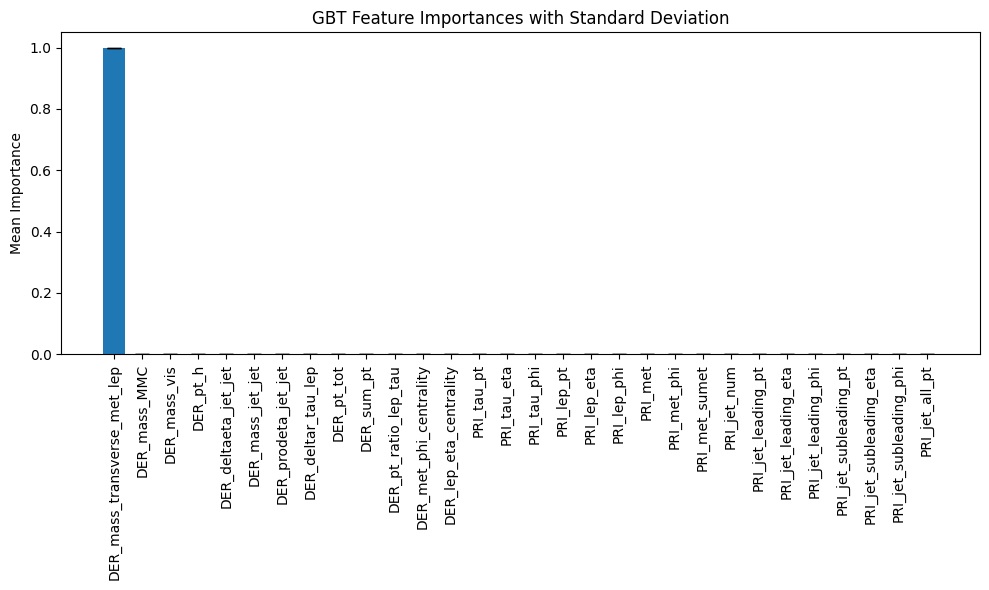

In [86]:

plt.figure(figsize=(10, 6))
plt.bar(feat_importances_gbt['Feature'], feat_importances_gbt['Mean Importance'], yerr=feat_importances_gbt['Std Importance'], capsize=5)
plt.xticks(rotation=90)
plt.ylabel('Mean Importance')
plt.title('GBT Feature Importances with Standard Deviation')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

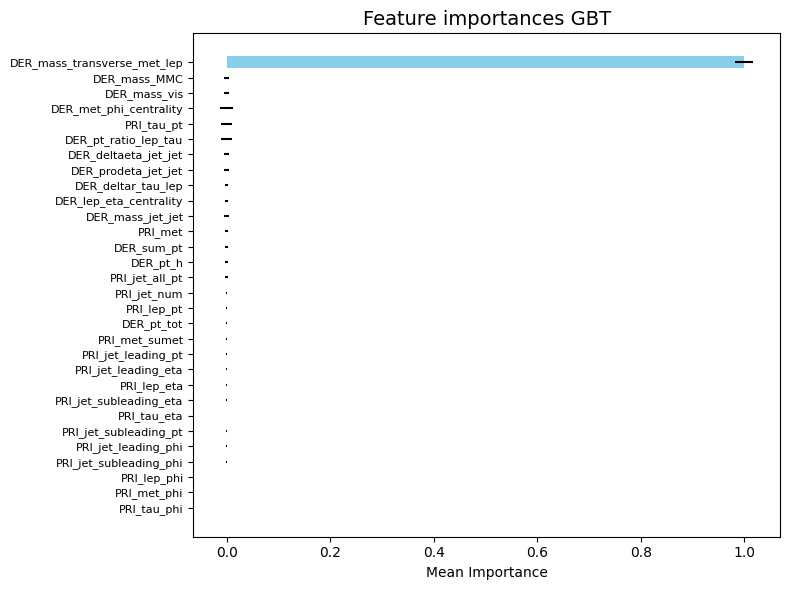

In [87]:

# Sort features by mean importance (highest to lowest)
sorted_idx_gbt = np.argsort(importances_mean_gbt)[::-1]

# Get sorted values
sorted_importances_gbt = importances_mean_gbt[sorted_idx]
sorted_std_gbt = importances_std_gbt[sorted_idx]
sorted_features_gbt = higgsdata_features_imputed.columns[sorted_idx]

# Create the figure
plt.figure(figsize=(8, 6))
plt.title("Feature importances GBT", fontsize=14)

# Plot horizontal bars with error bars showing ± std
plt.barh(range(len(sorted_features_gbt)), sorted_importances_gbt,
         xerr=sorted_std, align='center', color='skyblue', ecolor='black')

# Add feature names as y-axis labels
plt.yticks(range(len(sorted_features_gbt)), sorted_features_gbt, fontsize=8)

# Invert y-axis so the most important feature is on top
plt.gca().invert_yaxis()

# Axis labels
plt.xlabel("Mean Importance", fontsize=10)
plt.tight_layout()
plt.show()


**Caption:**
Feature importances for the Gradient Boosted Tree (GBT) model, showing the mean contribution of each variable to the classifier’s decision-making process across multiple runs. The most influential features — DER_mass_MMC, DER_mass_transverse_met_lep, and DER_mass_vis — dominate the model, confirming that reconstructed and transverse mass variables carry the strongest discriminative power between signal and background events. Compared to the Random Forest results, the GBT model produces a more concentrated distribution of importance, indicating that it relies on a smaller subset of highly informative features to optimize classification performance.

**Chatgpt: Differences between rf and gbt models in feature importances:**

| Observation                 | Random Forest                                                                                                  | Gradient Boosted Tree                                                                                                              |
| --------------------------- | -------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **Top features**            | Several: `DER_mass_transverse_met_lep`, `DER_mass_MMC`, `DER_mass_vis`, `PRI_tau_pt`, `DER_met_phi_centrality` | Only a few: `DER_mass_MMC`, `DER_mass_transverse_met_lep`, `DER_mass_vis`                                                          |
| **Importance distribution** | Broader — many features have small but non-zero values.                                                        | Sharper — top 2–3 features carry most of the importance (≈ 80–90%).                                                                |
| **Interpretation**          | RF “spreads attention” — uses a combination of features to make robust, balanced decisions.                    | GBT “focuses attention” — repeatedly improves splits based on the same few most informative features, amplifying their importance. |
| **Error bars (std)**        | Slightly higher variability — randomness from bootstrap sampling affects which features get used.              | Smaller variability — sequential optimization yields more consistent feature ranking.                                              |


In [88]:
#plt.figure()


# Task 8b: hyperparameters grid search
- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [89]:
# choose your preferred values for the parameters you will test
random_grid = {
    'n_estimators': [10, 100],
    'max_depth': [3, 10, None],
    'bootstrap': [True, False],
    'max_features': ['log2','sqrt'] # 'auto' is deprecated, use 'sqrt' or 'log2'
}
print(random_grid)

#technically contains 2 × 3 × 2 × 2 = 24 total possible combinations,

{'n_estimators': [10, 100], 'max_depth': [3, 10, None], 'bootstrap': [True, False], 'max_features': ['log2', 'sqrt']}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [90]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
#rf = RandomForestClassifier(random_state=302)
#random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                 # n_iter=18, cv=3)


In [91]:
# RandomizedSearchCV with n_iter=18 will test only 18 random ones instead of all 24

Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [93]:
#3-Fit the searcher

random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                  n_iter=18, cv=3)
random_search.fit(x_train[::5], labels_train[::5])
# subselecting every 5th observation to reduce the computational time

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=6,
                                                    random_state=9),
                   n_iter=18,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': [10, 100]})

In [94]:
random_search.best_estimator_

RandomForestClassifier(random_state=9)

In [95]:
print("the best scoring combo happened to be:")
for k in random_search.best_params_:
  print(k,random_search.best_params_[k])

the best scoring combo happened to be:
n_estimators 100
max_features sqrt
max_depth None
bootstrap True


In [96]:
rf= RandomForestClassifier(**random_search.best_params_)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# Assuming 'top_feature_indices' contains the indices of your top 4 features from previous analysis

# Select only the top 4 features from the training data
#x_train_top_features = x_train[:, top_feature_indices]

# Build and fit the tuned Random Forest model
rf = RandomForestClassifier(**random_search.best_params_, random_state=42)
rf.fit(x_train, labels_train)

In [ ]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
# Select only the top 4 features from the test data
x_test_top_features = x_test[:, top_feature_indices]
print("Best score is {}".format(rf.score(x_test_top_features, labels_test)))
print("Best score means the tuned Random Forest correctly classified ~ {}".format(rf.score(x_test_top_features, labels_test)*100) )
print("of test events when using the top 4 features and best hyperparameters.")

In [ ]:
df = pd.DataFrame(random_search.cv_results_) # this shows the result for the given parameters
df

In [ ]:
#df.sort_values("rank_test_score").head()


In [ ]:
#for gbt model given by chat gpt

X_train_top4 = x_train[:, top_feature_indices]
X_test_top4  = x_test[:,  top_feature_indices]

gbt = GradientBoostingClassifier(random_state=42)

gbt_grid = {
    "n_estimators":   [50, 100, 200],
    "max_depth":      [2, 3, 4],        # depth of each regression tree (stumps → shallow trees)
    "learning_rate":  [0.05, 0.1, 0.2], # shrinkage
    "subsample":      [1.0, 0.8, 0.6],  # 1.0 = deterministic; <1 adds stochasticity
    "max_features":   [ "sqrt", "log2"]
}

gbt_search = RandomizedSearchCV(
    estimator=gbt,
    param_distributions=gbt_grid,
    n_iter=18,               # same “18 combinations” as RF
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# fit (you can keep the sub-sampling for speed, like RF did)
gbt_search.fit(X_train_top4, labels_train)

print("Best GBT params:", gbt_search.best_params_)
print("Best CV ROC-AUC (GBT):", gbt_search.best_score_)


In [ ]:
gbt_best = gbt_search.best_estimator_
gbt_best.fit(X_train_top4, labels_train)

print("GBT test accuracy (top-4 features):",
      gbt_best.score(X_test_top4, labels_test))

In [ ]:


# ensure positive class is 's'
pos_idx_gbt = list(gbt_best.classes_).index('s')
pos_idx_rf  = list(rf.classes_).index('s')   # your tuned RF from before

# probabilities
gbt_proba = gbt_best.predict_proba(X_test_top4)[:, pos_idx_gbt]
rf_proba  = rf.predict_proba(X_test_top4)[:, pos_idx_rf]

# binarize y ('s'->1, 'b'->0)
y_test_bin = (labels_test == 's').astype(int)

# ROC / AUC
gbt_fpr, gbt_tpr, _ = roc_curve(y_test_bin, gbt_proba)
rf_fpr,  rf_tpr,  _ = roc_curve(y_test_bin, rf_proba)

gbt_auc = roc_auc_score(y_test_bin, gbt_proba)
rf_auc  = roc_auc_score(y_test_bin, rf_proba)

# plot
plt.figure(figsize=(6,4))
plt.plot(gbt_fpr, gbt_tpr, label=f"GBT (AUC = {gbt_auc:.3f})")
plt.plot(rf_fpr,  rf_tpr,  label=f"RF  (AUC = {rf_auc:.3f})")
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlim(0,1); plt.ylim(0,1.05)
plt.xlabel("False positive rate"); plt.ylabel("True positive rate")
plt.title("ROC — Tuned GBT vs Tuned RF (top 4 features)")
plt.legend(loc="lower right")
plt.tight_layout(); plt.show()


**Caption:**

ROC curves comparing the tuned Gradient Boosted Tree (GBT) and Random Forest (RF) models using the top four most important features from the Higgs Boson dataset. Both models achieve strong discrimination between signal and background events. The GBT curve lies slightly above the RF curve across most of the range, indicating that GBT achieves higher true positive rates for the same false positive rates. This reflects GBT’s advantage in fine-tuning decision boundaries by sequentially correcting errors, while the RF’s performance is slightly lower but more uniform due to its averaging of independently trained trees.

In this plot, the models were trained using only the 4 most important features (the ones extracted earlier). So, they are both simplified but optimized versions of the full models. Yet, even when trained with just 4 features, both models retain high classification power.

**GBT consistently outperforms RF, both with full (plotted before) and reduced feature sets.**

The AUC increase from 0.879 → 0.899 (GBT) and 0.859 → 0.880 (RF) shows that more features provide a small benefit but are not essential. This confirms that the feature selection step was successful — the top features already carry most of the classification power

In summary: GBT is the more accurate model overall, while RF is simpler and more stable.

Plot a simple  ROC curve for the RF model with the best parameters found in the previous step. Describe it. Compare it with the GBT model from before